In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import pickle
import hvplot.pandas

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
df = pd.read_csv(
    Path('../data/stocks_history.csv'),
    index_col='Unnamed: 0',
    infer_datetime_format=True,
    parse_dates=True
)
df.head()

,MSFT_open,MSFT_high,MSFT_low,MSFT_close,AMD_open,AMD_high,AMD_low,AMD_close,TSLA_open,TSLA_high,...,JNJ_low,JNJ_close,REGN_open,REGN_high,REGN_low,REGN_close,GILD_open,GILD_high,GILD_low,GILD_close
2010-06-29,24.13,24.20,23.110,23.31,7.93,7.93,7.41,7.48,19.00,25.0000,...,58.680,59.24,23.67,23.95,22.86,22.98,35.40,35.61,34.740,34.97
2010-06-30,23.30,23.68,22.950,23.01,7.58,7.65,7.30,7.32,25.79,30.4192,...,58.940,59.06,23.05,23.47,22.32,22.32,34.83,35.13,34.260,34.28
2010-07-01,23.09,23.32,22.730,23.16,7.35,7.53,7.10,7.39,25.00,25.9200,...,58.650,59.07,22.31,22.37,20.45,20.79,34.24,34.27,33.300,34.14
2010-07-02,23.36,23.48,23.050,23.27,7.45,7.48,7.02,7.17,23.00,23.1000,...,58.850,59.08,21.06,21.88,20.75,21.61,34.38,35.16,34.180,34.87
2010-07-06,23.70,24.09,23.584,23.82,7.40,7.42,6.96,7.04,20.00,20.0000,...,58.669,59.08,22.03,22.03,21.16,21.36,35.11,35.42,34.415,34.77


In [100]:
# drop all columns except closing prices
dropped_columns = [
    'MSFT_open',
    'MSFT_high',
    'MSFT_low',
    'TSLA_open',
    'TSLA_high',
    'TSLA_low',
    'JNJ_open',
    'JNJ_high',
    'JNJ_low',
    'REGN_open',
    'REGN_high',
    'REGN_low',
    'GILD_open',
    'GILD_high',
    'GILD_low',
    'AMD_open',
    'AMD_high',
    'AMD_low',
]
df.drop(columns=dropped_columns, inplace=True)
df.head()

,MSFT_close,AMD_close,TSLA_close,JNJ_close,REGN_close,GILD_close
2010-06-29,23.31,7.48,23.89,59.24,22.98,34.97
2010-06-30,23.01,7.32,23.83,59.06,22.32,34.28
2010-07-01,23.16,7.39,21.96,59.07,20.79,34.14
2010-07-02,23.27,7.17,19.20,59.08,21.61,34.87
2010-07-06,23.82,7.04,16.11,59.08,21.36,34.77


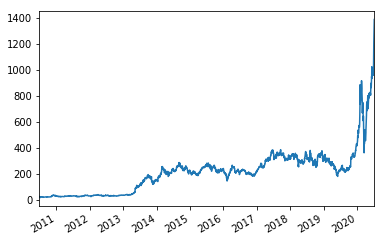

In [102]:
df['TSLA_close'].plot()

In [ ]:
df.plot()

In [103]:
df['MSFT_return'] = df['MSFT_close'].pct_change() * 100
df['MSFT_lagged_return'] = df['MSFT_return'].shift()
df['AMD_return'] = df['AMD_close'].pct_change() * 100
df['AMD_lagged_return'] = df['AMD_return'].shift()
df['TSLA_return'] = df['TSLA_close'].pct_change() * 100
df['TSLA_lagged_return'] = df['TSLA_return'].shift()
df['JNJ_return'] = df['JNJ_close'].pct_change() * 100
df['JNJ_lagged_return'] = df['JNJ_return'].shift()
df['REGN_return'] = df['REGN_close'].pct_change() * 100
df['REGN_lagged_return'] = df['REGN_return'].shift()
df['GILD_return'] = df['GILD_close'].pct_change() * 100
df['GILD_lagged_return'] = df['GILD_return'].shift()

In [104]:
df.tail()

,MSFT_close,AMD_close,TSLA_close,JNJ_close,REGN_close,GILD_close,MSFT_return,MSFT_lagged_return,AMD_return,AMD_lagged_return,TSLA_return,TSLA_lagged_return,JNJ_return,JNJ_lagged_return,REGN_return,REGN_lagged_return,GILD_return,GILD_lagged_return
2020-06-30,203.51,52.61,1079.81,140.63,623.65,76.94,2.554928,1.074721,4.634049,0.359281,6.980730,5.169108,1.143556,0.892533,2.092098,-0.080149,3.192060,-0.013410
2020-07-01,204.70,52.58,1119.63,140.38,609.17,76.06,0.584738,2.554928,-0.057023,4.634049,3.687686,6.980730,-0.177771,1.143556,-2.321815,2.092098,-1.143748,3.192060
2020-07-02,206.26,52.34,1208.66,140.97,622.45,76.35,0.762091,0.584738,-0.456447,-0.057023,7.951734,3.687686,0.420288,-0.177771,2.180015,-2.321815,0.381278,-1.143748
2020-07-06,210.70,53.40,1371.58,142.98,627.25,76.76,2.152623,0.762091,2.025220,-0.456447,13.479390,7.951734,1.425835,0.420288,0.771146,2.180015,0.537001,0.381278
2020-07-07,208.25,52.93,1389.86,142.85,640.88,76.42,-1.162791,2.152623,-0.880150,2.025220,1.332770,13.479390,-0.090922,1.425835,2.172977,0.771146,-0.442939,0.537001


In [105]:
df = df.dropna()
df.tail()

,MSFT_close,AMD_close,TSLA_close,JNJ_close,REGN_close,GILD_close,MSFT_return,MSFT_lagged_return,AMD_return,AMD_lagged_return,TSLA_return,TSLA_lagged_return,JNJ_return,JNJ_lagged_return,REGN_return,REGN_lagged_return,GILD_return,GILD_lagged_return
2020-06-30,203.51,52.61,1079.81,140.63,623.65,76.94,2.554928,1.074721,4.634049,0.359281,6.980730,5.169108,1.143556,0.892533,2.092098,-0.080149,3.192060,-0.013410
2020-07-01,204.70,52.58,1119.63,140.38,609.17,76.06,0.584738,2.554928,-0.057023,4.634049,3.687686,6.980730,-0.177771,1.143556,-2.321815,2.092098,-1.143748,3.192060
2020-07-02,206.26,52.34,1208.66,140.97,622.45,76.35,0.762091,0.584738,-0.456447,-0.057023,7.951734,3.687686,0.420288,-0.177771,2.180015,-2.321815,0.381278,-1.143748
2020-07-06,210.70,53.40,1371.58,142.98,627.25,76.76,2.152623,0.762091,2.025220,-0.456447,13.479390,7.951734,1.425835,0.420288,0.771146,2.180015,0.537001,0.381278
2020-07-07,208.25,52.93,1389.86,142.85,640.88,76.42,-1.162791,2.152623,-0.880150,2.025220,1.332770,13.479390,-0.090922,1.425835,2.172977,0.771146,-0.442939,0.537001


In [106]:
# Slice data in test and training 
train = df.loc['2010':'2017']
test = df.loc['2018':'2020']

In [107]:
# Create dataframes for X_train and X_test
# Create series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["MSFT_return"].to_frame()
X_test = test["MSFT_lagged_return"].to_frame()
y_train = train["MSFT_return"]
y_test = test["MSFT_return"]

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)

In [111]:
# Construct a dataframe using just the "y" training data:
out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe16fccd950>,
      dtype=object)

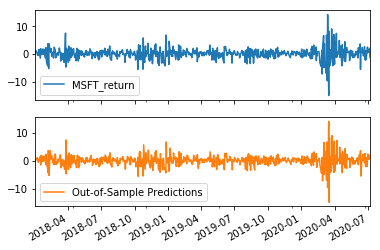

In [112]:
# Plot the out-of-sample results for 2019
out_of_sample_results.plot(subplots=True)

In [150]:
out_of_sample_results.head(15)

,MSFT_return,Out-of-Sample Predictions
2018-01-02,0.479308,-0.209986
2018-01-03,0.465387,0.479308
2018-01-04,0.880139,0.465387
2018-01-05,1.239812,0.880139
2018-01-08,0.102052,1.239812
2018-01-09,-0.067966,0.102052
2018-01-10,-0.453412,-0.067966
2018-01-11,0.296060,-0.453412
2018-01-12,1.725704,0.296060
2018-01-16,-1.395089,1.725704


In [116]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["MSFT_return"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 3.36929249511618


In [118]:
# Create dataframes for X_train and X_test
# Create series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["MSFT_return"].to_frame()
X_test = test["MSFT_lagged_return"].to_frame()
y_train = train["MSFT_return"]
y_test = test["MSFT_return"]

In [119]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)

In [121]:
# Construct a dataframe using just the "y" training data:
out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe16e8f76d0>,
      dtype=object)

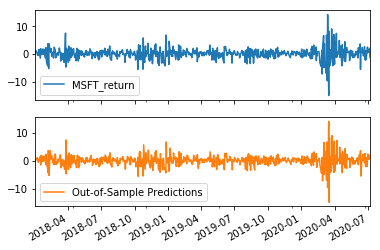

In [122]:
# Plot the out-of-sample results for 2019
out_of_sample_results.plot(subplots=True)

In [123]:
out_of_sample_results.sample(10)

,MSFT_return,Out-of-Sample Predictions
2018-12-17,-2.961426,-3.124714
2018-09-26,-0.410660,-0.191855
2018-01-10,-0.453412,-0.067966
2019-01-09,1.429961,0.725064
2019-09-11,0.029394,-1.047120
2018-06-06,0.293571,0.511459
2018-08-22,1.019060,-0.832787
2019-08-16,1.832735,-0.223914
2019-01-29,-2.036544,-1.950173
2020-04-13,0.224052,0.006056


In [125]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["MSFT_return"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 3.36929249511618


# Rolling Out-of-Sample Predictions

In [126]:
# Split the index into weekly periods
weeks = df.index.to_period("w").unique()
print(weeks[0])

2010-06-28/2010-07-04


In [127]:
print(len(weeks))

524


In [128]:
# Declare the training window of 12 weeks
# Define the timeframe of rolling windows
training_window = 50
timeframe = len(weeks) - training_window - 1
print(timeframe)

473


In [129]:
# Construct empty placeholder dataframes.
# (During each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_actuals = pd.DataFrame(columns=["Actual Returns"])

In [130]:
# During rolling iteration, split into train and test sets.
# Use linear regression to make out-of-sample predictions.
# Append the results to external dataframes.
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = weeks[training_window+i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_week = weeks[training_window + i + 1]
    
    # String of testing window
    start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = df.loc[start_of_training_period:end_of_training_period]
    test = df.loc[start_of_test_week:end_of_test_week]
    
    # Create new dataframes:
    X_train = train["MSFT_lagged_return"].to_frame()
    y_train = train["MSFT_return"]
    X_test = test["MSFT_lagged_return"].to_frame()
    y_test = test["MSFT_return"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Create a temporary dataframe to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Out-of-Sample Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test dataframe, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
    
    # Append these two dataframes (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)   
    

In [131]:
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.head()

,Actual Returns,Out-of-Sample Predictions
2011-06-20,0.865622,0.047549
2011-06-21,1.185125,0.043414
2011-06-22,-0.444265,0.048947
2011-06-23,-0.081136,0.020732
2011-06-24,-1.339829,0.027020


In [132]:
# 2019 Data
results_2020 = Results.loc['2020':]
results_2020.head()

,Actual Returns,Out-of-Sample Predictions
2020-01-02,1.851617,0.200520
2020-01-03,-1.245175,0.027026
2020-01-06,0.258479,0.340600
2020-01-07,-0.911778,0.175822
2020-01-08,1.592842,0.304065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe16e92a210>,
      dtype=object)

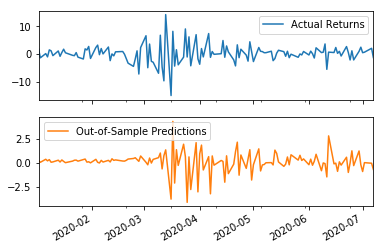

In [133]:
# Plot the results
results_2020.plot(subplots=True)

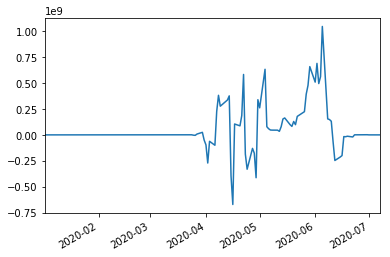

In [141]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + results_2020['Out-of-Sample Predictions']).cumprod() - 1
cumulative_returns.plot()

In [163]:
results_2020_divided = (results_2020['Out-of-Sample Predictions']/100)
cumulative_returns_divided = (results_2020_divided + 1).cumprod()-1
prices = (cumulative_returns_divided +1) * (df.loc['2020-01-02','MSFT_close'])
prices.hvplot()

:Curve   [index]   (Out-of-Sample Predictions)

In [136]:
# Out-of-sample metrics
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    results_2020["Actual Returns"],
    results_2020["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rolling_rmse = np.sqrt(mse)
print(f"Rolling Out-of-Sample Root Mean Squared Error (RMSE): {rolling_rmse}")

Rolling Out-of-Sample Root Mean Squared Error (RMSE): 3.064092248751763


In [137]:
# Create a pickled model (save it)

pkl_filename = "pickle_regression_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)